In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 서울시 지하철 호선별 역별 유무임 승하차 인원정보.csv

### Data Loading

In [2]:
subway = pd.read_csv('subway.csv', encoding='CP949')

### Data Pre-processing & Feature Engineering

In [3]:
# 작업일자 제외
subway = subway.iloc[:,0:7]

In [4]:
# 중복데이터 제거
subway = subway.drop_duplicates(['사용월','호선명','지하철역','유임승차인원','무임승차인원','유임하차인원','무임하차인원'])

In [5]:
# 연도, 월 분리
subway["연도"] = subway["사용월"].astype(str).str[:4]
subway["월"] = subway["사용월"].astype(str).str[4:]

In [6]:
# 9호선2~3단계, 9호선2단계 >> 9호선 으로 변경
subway.loc[subway['호선명'] == '9호선2~3단계','호선명'] = '9호선'
subway.loc[subway['호선명'] == '9호선2단계','호선명'] = '9호선'

In [69]:
# 삼성, 삼성(무역센터) >> 삼성 으로 통합
subway.loc[subway['지하철역'] == '삼성(무역센터)','지하철역'] = '삼성'

In [70]:
# 1호선 ~ 9호선 데이터만 선택

sub1 = subway[subway['호선명'] == '1호선']
sub2 = subway[subway['호선명'] == '2호선']
sub3 = subway[subway['호선명'] == '3호선']
sub4 = subway[subway['호선명'] == '4호선']
sub5 = subway[subway['호선명'] == '5호선']
sub6 = subway[subway['호선명'] == '6호선']
sub7 = subway[subway['호선명'] == '7호선']
sub8 = subway[subway['호선명'] == '8호선']
sub9 = subway[subway['호선명'] == '9호선']

sub = pd.concat([sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9]).reset_index(drop=True)

sub.호선명.values

array(['1호선', '1호선', '1호선', ..., '9호선', '9호선', '9호선'], dtype=object)

In [71]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     19779 non-null  int64 
 1   호선명     19779 non-null  object
 2   지하철역    19779 non-null  object
 3   유임승차인원  19779 non-null  int64 
 4   무임승차인원  19779 non-null  int64 
 5   유임하차인원  19779 non-null  int64 
 6   무임하차인원  19779 non-null  int64 
 7   연도      19779 non-null  object
 8   월       19779 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


In [72]:
# 만 명 단위로 변경
col_list = ['유임승차인원','무임승차인원','유임하차인원','무임하차인원']
sub[col_list] = sub[col_list]/10000

In [73]:
# 유임승하차인원, 무임승하차인원, 승하차인원 추가
sub.loc[:,'유임승하차인원'] = (sub['유임승차인원']+sub['유임하차인원'])
sub.loc[:,'무임승하차인원'] = (sub['무임승차인원']+sub['무임하차인원'])
sub.loc[:,'승하차인원'] = (sub['유임승하차인원']+sub['무임승하차인원'])

In [74]:
# 승차인원, 하차인원 추가
sub.loc[:,'승차인원'] = (sub['유임승차인원']+sub['무임승차인원'])
sub.loc[:,'하차인원'] = (sub['유임하차인원']+sub['무임하차인원'])

In [75]:
# 유,무임하차율 추가
sub.loc[:,'유임하차율'] = sub['유임하차인원']/sub['하차인원']*100
sub.loc[:,'무임하차율'] = sub['무임하차인원']/sub['하차인원']*100

In [76]:
# 유,무임승하차율 추가
sub.loc[:,'유임승하차율'] = sub['유임승하차인원']/sub['승하차인원']*100
sub.loc[:,'무임승하차율'] = sub['무임승하차인원']/sub['승하차인원']*100

In [77]:
sub.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,연도,월,유임승하차인원,무임승하차인원,승하차인원,승차인원,하차인원,유임하차율,무임하차율,유임승하차율,무임승하차율
0,202004,1호선,서울역,77.5859,13.9595,74.8330,13.0554,2020,04,152.4189,27.0149,179.4338,91.5454,87.8884,85.145480,14.854520,84.944364,15.055636
1,202004,1호선,종각,70.6082,9.6784,68.7093,9.0826,2020,04,139.3175,18.7610,158.0785,80.2866,77.7919,88.324491,11.675509,88.131846,11.868154
2,202004,1호선,종로3가,38.8837,23.1829,36.8220,22.0625,2020,04,75.7057,45.2454,120.9511,62.0666,58.8845,62.532585,37.467415,62.591990,37.408010
3,202004,1호선,신설동,24.0865,9.0729,23.9399,8.6446,2020,04,48.0264,17.7175,65.7439,33.1594,32.5845,73.470208,26.529792,73.050732,26.949268
4,202004,1호선,시청,38.1606,5.2670,38.4171,5.0782,2020,04,76.5777,10.3452,86.9229,43.4276,43.4953,88.324716,11.675284,88.098418,11.901582


### 연도별 호선별  총 승하차인원

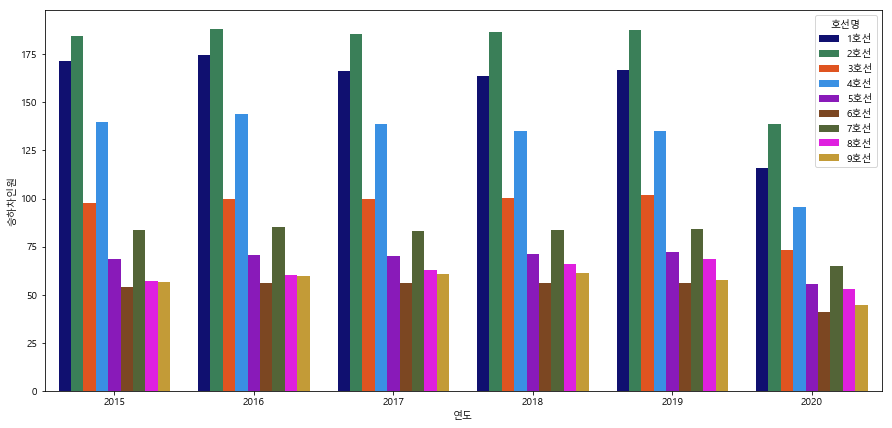

In [29]:
plt.rcParams['font.family'] = 'Malgun Gothic'
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
plt.figure(figsize=(15,7))
sns.barplot(x='연도', y='승하차인원', hue='호선명', data=sub, palette=pal, ci=False)

### 연도별 호선별  무임승하차인원


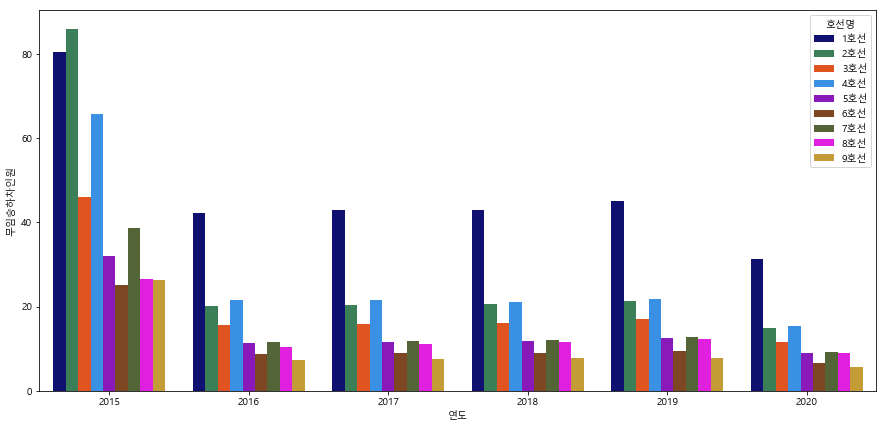

In [30]:
plt.rcParams['font.family'] = 'Malgun Gothic'
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
plt.figure(figsize=(15,7))
sns.barplot(x='연도', y='무임승하차인원', hue='호선명', data=sub, palette=pal, ci=False)

### 연도별 호선별  무임승하차율


C:\Users\Seoul IT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


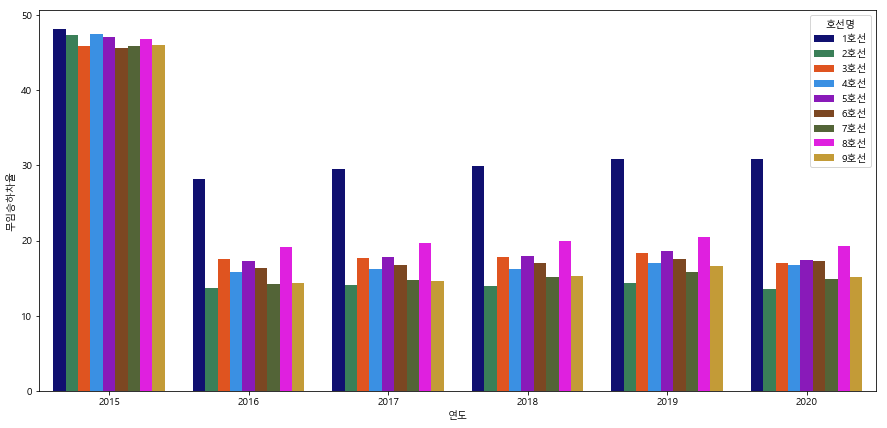

In [82]:
plt.rcParams['font.family'] = 'Malgun Gothic'
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
plt.figure(figsize=(15,7))
sns.barplot(x='연도', y='무임승하차율', hue='호선명', data=sub, palette=pal, ci=False)

### 호선별 무임승하차인원

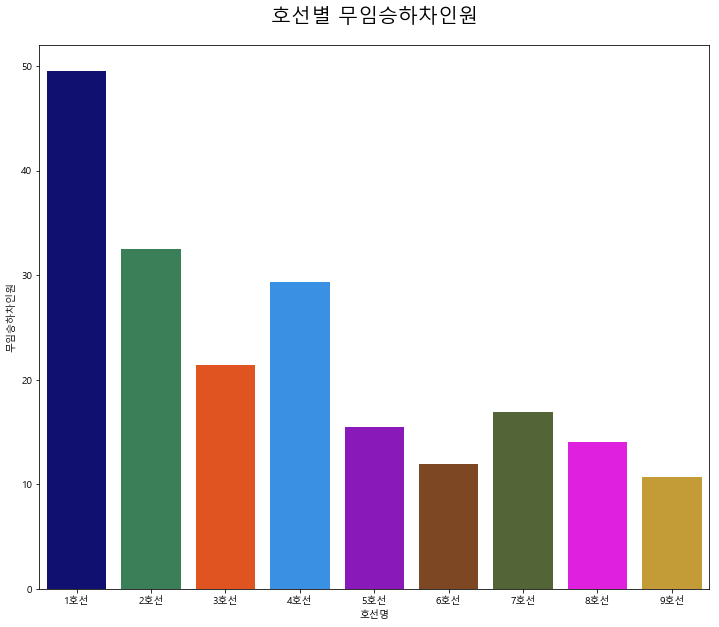

In [19]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('호선별 무임승하차인원', size=20, position=(0.5, 1.0+0.03))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.barplot(x='호선명', y='무임승하차인원', data=sub, ci=False, palette=pal);

### 호선별 무임하차율

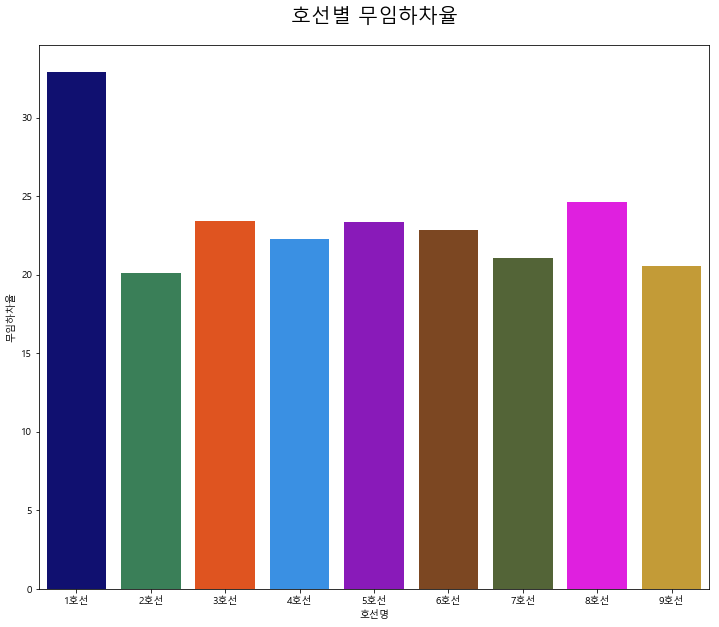

In [17]:
plt.figure(figsize=(12,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('호선별 무임하차율', size=20, position=(0.5, 1.0+0.03))

# 호선별 색상 파레트 설정
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.barplot(x='호선명', y='무임하차율', data=sub, ci=False, palette=pal)

### 연도별 호선별 승하차인원 (line plot)


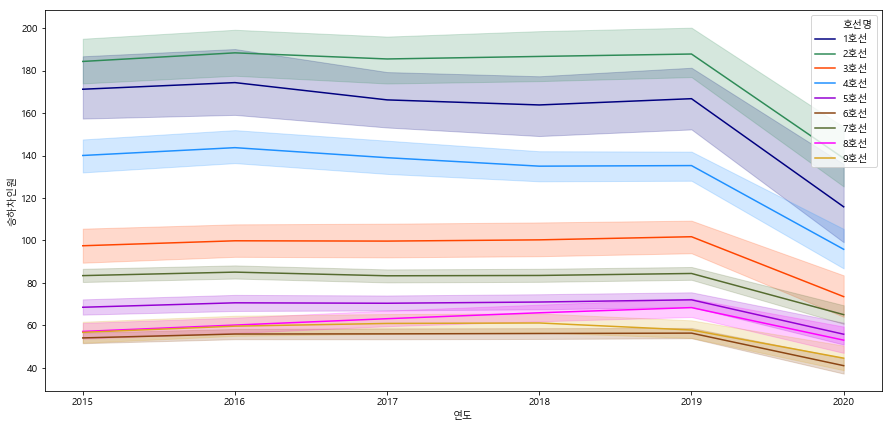

In [32]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.lineplot(x='연도', y="승하차인원", hue='호선명', palette=pal, data=sub)

### 연도별 호선별  무임승하차율 (line plot)


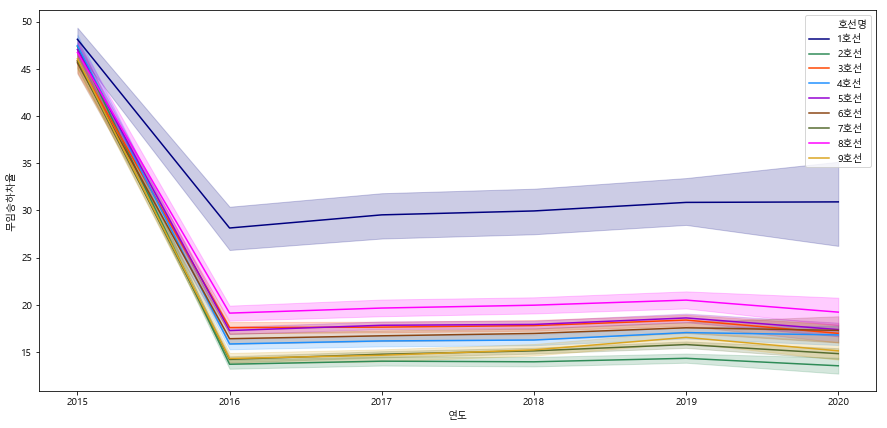

In [83]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.lineplot(x='연도', y="무임승하차율", hue='호선명', palette=pal, data=sub)

### 연도별 호선별  유임승하차율 (line plot)


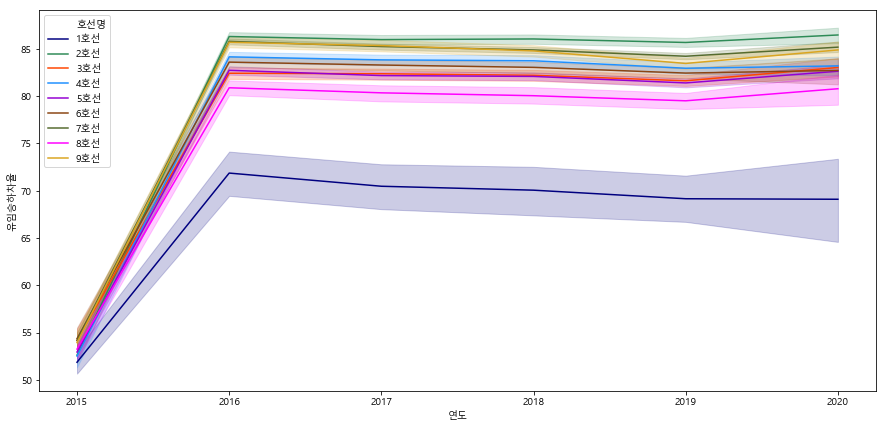

In [84]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.lineplot(x='연도', y="유임승하차율", hue='호선명', palette=pal, data=sub)

### 연도별 승하차인원 변동 추이 swarmplot

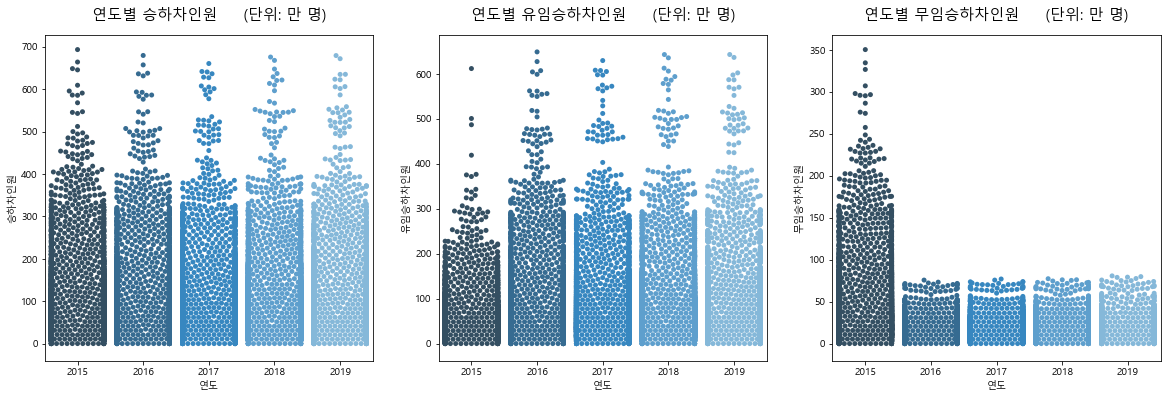

In [24]:
plt.figure(figsize=(20,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1,3,1)
plt.xticks(ticks=[0,1,2,3,4], labels=['2015','2016','2017','2018','2019'])
plt.title('연도별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.swarmplot(x='연도', y='승하차인원', data=sub[sub['연도'] != '2020'], palette="Blues_d")

plt.subplot(1,3,2)
plt.xticks(ticks=[0,1,2,3,4], labels=['2015','2016','2017','2018','2019'])
plt.title('연도별 유임승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.swarmplot(x='연도', y='유임승하차인원', data=sub[sub['연도'] != '2020'], palette="Blues_d")

plt.subplot(1,3,3)
plt.xticks(ticks=[0,1,2,3,4], labels=['2015','2016','2017','2018','2019'])
plt.title('연도별 무임승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.swarmplot(x='연도', y='무임승하차인원', data=sub[sub['연도'] != '2020'], palette="Blues_d")

### 연도별 호선별  승하차인원 heatmap

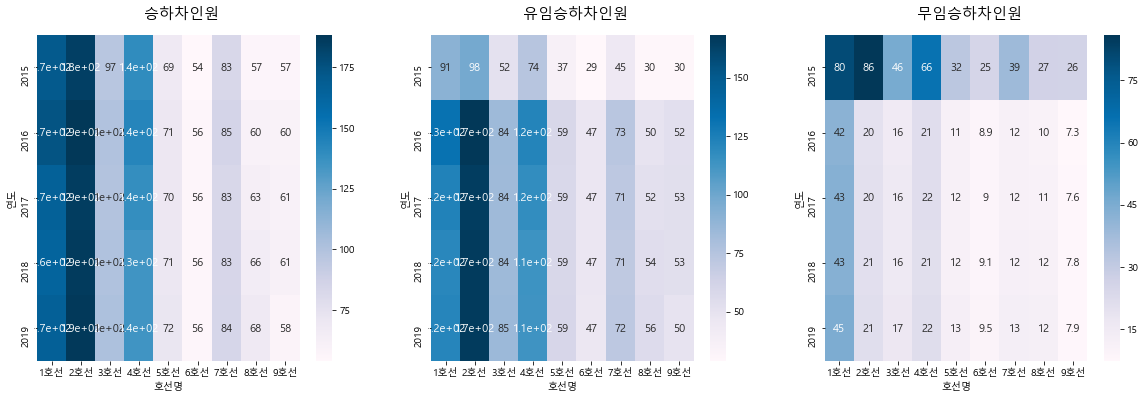

In [33]:
sub_h = sub[sub['연도'] != '2020']

plt.figure(figsize=(20,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(1,3,1)
plt.title('승하차인원', size=15, position=(0.55, 1.0+0.03))
pivot1 = sub_h.pivot_table(index='연도', columns='호선명', values='승하차인원')
sns.heatmap(pivot1, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

plt.subplot(1,3,2)
plt.title('유임승하차인원', size=15, position=(0.55, 1.0+0.03))
pivot2 = sub_h.pivot_table(index='연도', columns='호선명', values='유임승하차인원')
sns.heatmap(pivot2, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

plt.subplot(1,3,3)
plt.title('무임승하차인원', size=15, position=(0.55, 1.0+0.03))
pivot3 = sub_h.pivot_table(index='연도', columns='호선명', values='무임승하차인원')
sns.heatmap(pivot3, annot = True, annot_kws = {"size" : 11}, cmap=plt.cm.PuBu)

### 총 승하차인원, 유,무임 승하차인원의 누적분포

Text(0, 0.5, '')

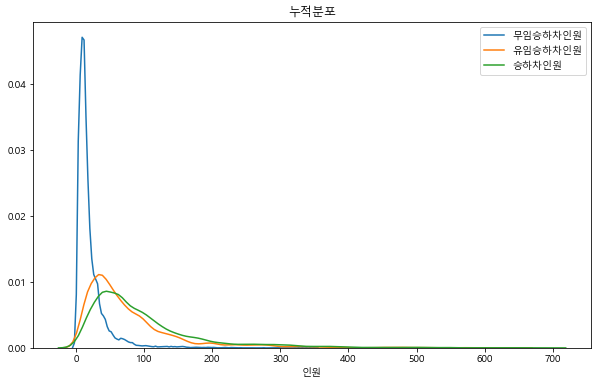

In [34]:
f, ax = plt.subplots(figsize=(10, 6))

sns.distplot(sub['무임승하차인원'], hist=False, label="무임승하차인원")
sns.distplot(sub['유임승하차인원'], hist=False, label="유임승하차인원")
sns.distplot(sub['승하차인원'], hist=False, label="승하차인원")

ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set_title('누적분포')
ax.set_xlabel("인원")
ax.set_ylabel("")

### 유임승하차인원, 무임승하차인원, 총 승하차인원 세 변수의 pairplot

C:\Users\Seoul IT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


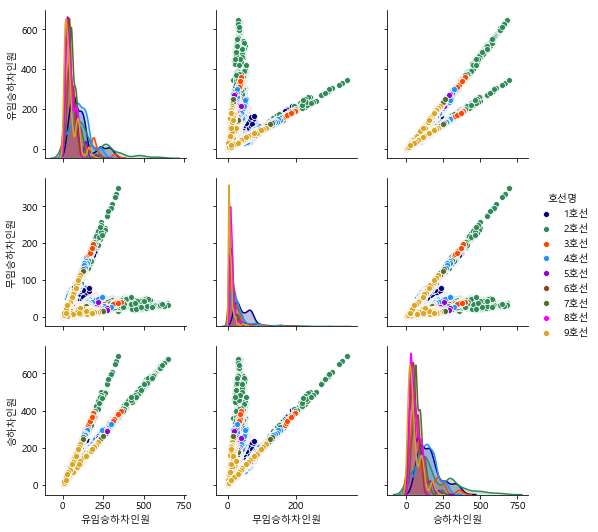

In [25]:
sns.pairplot(sub.iloc[:, [1,9,10,11]], hue='호선명', palette=pal);

### 총 승하차인원 대비 무임승하차인원

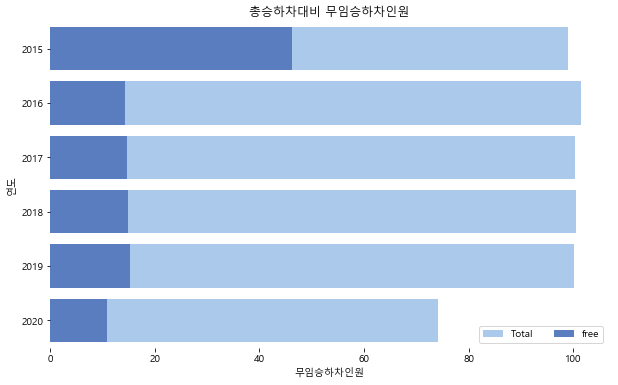

In [38]:
sub['연도'] = sub['연도'].astype('category')

f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x="승하차인원", y='연도', data=sub, label="Total", color="b", ci=False)

sort = sub.sort_values("승하차인원", ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="무임승하차인원", y="연도", data=sort, label="free", color="b", ci=False)
plt.title("총승하차대비 무임승하차인원")

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

### 연도별 무임하차율 top10

In [19]:
sub_15 = sub[sub.연도 == '2015'].reset_index(drop=True)
sub_16 = sub[sub.연도 == '2016'].reset_index(drop=True)
sub_17 = sub[sub.연도 == '2017'].reset_index(drop=True)
sub_18 = sub[sub.연도 == '2018'].reset_index(drop=True)
sub_19 = sub[sub.연도 == '2019'].reset_index(drop=True)

station = sub_15['지하철역'].unique()
get_off = []
for st in station:
    num = sub_15[sub_15['지하철역']==st]['무임하차인원'].sum()
    den = sub_15[sub_15['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_15_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_15_get_off = sub_15_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]


station = sub_16['지하철역'].unique()
get_off = []
for st in station:
    num = sub_16[sub_16['지하철역']==st]['무임하차인원'].sum()
    den = sub_16[sub_16['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_16_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_16_get_off = sub_16_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]


station = sub_17['지하철역'].unique()
get_off = []
for st in station:
    num = sub_17[sub_17['지하철역']==st]['무임하차인원'].sum()
    den = sub_17[sub_17['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_17_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_17_get_off = sub_17_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]


station = sub_18['지하철역'].unique()
get_off = []
for st in station:
    num = sub_18[sub_18['지하철역']==st]['무임하차인원'].sum()
    den = sub_18[sub_18['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_18_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_18_get_off = sub_18_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]


station = sub_19['지하철역'].unique()
get_off = []
for st in station:
    num = sub_19[sub_19['지하철역']==st]['무임하차인원'].sum()
    den = sub_19[sub_19['지하철역']==st]['하차인원'].sum()
    get_off.append(num/den*100)
    
sub_19_get_off = pd.DataFrame({'지하철역':station, '무임하차율':get_off})
sub_19_get_off = sub_19_get_off.sort_values(['무임하차율'], ascending=[False]).reset_index(drop=True)[:10]

C:\Users\Seoul IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


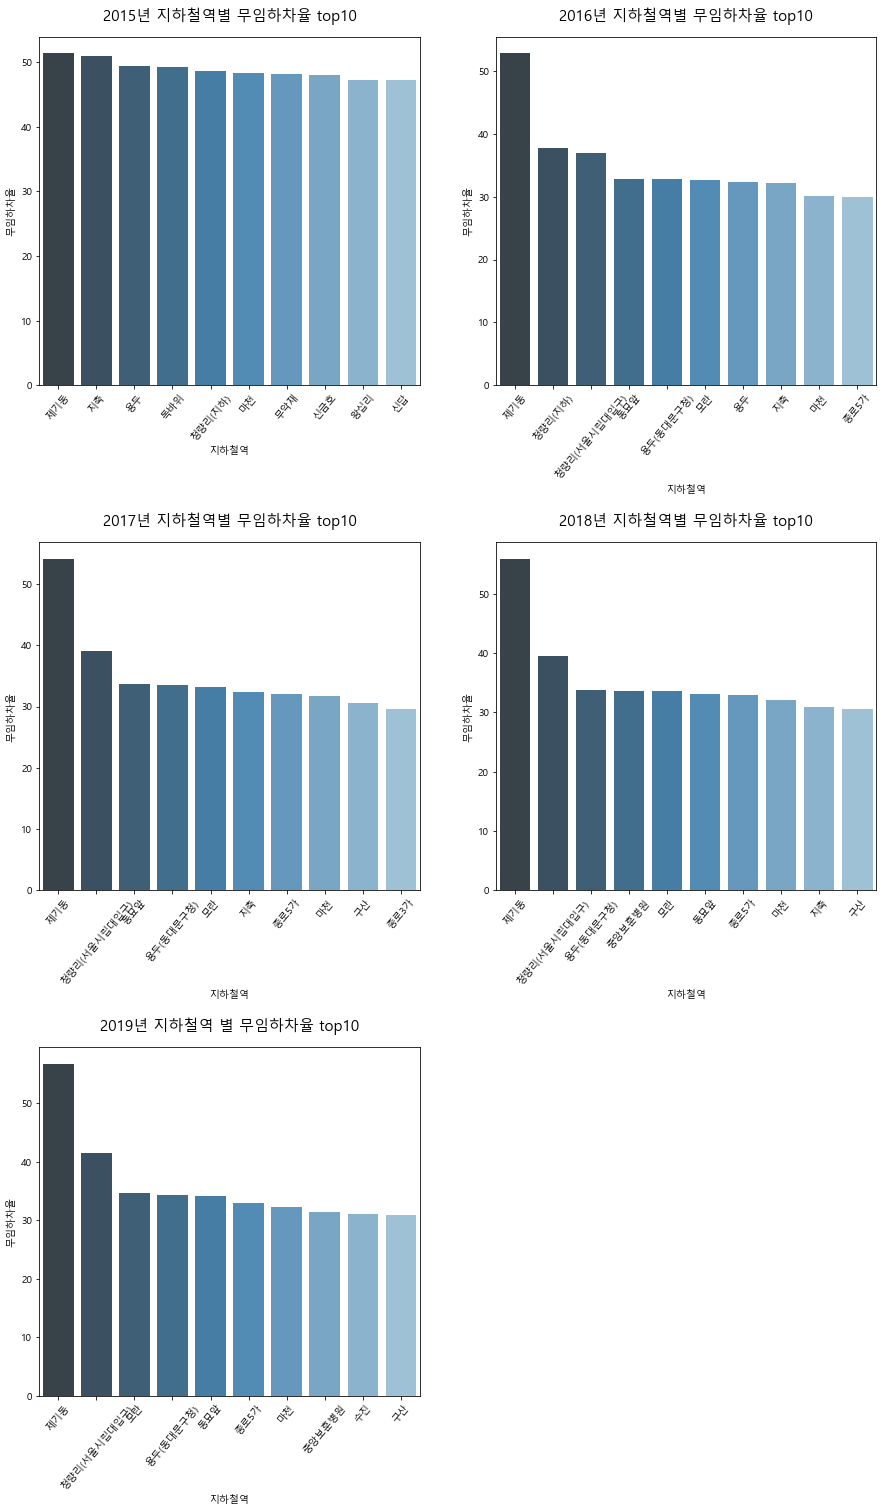

In [20]:
plt.figure(figsize=(15,25))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.xticks(rotation=50)
plt.title('2015년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_15_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.xticks(rotation=50)
plt.title('2016년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_16_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,3)
plt.xticks(rotation=50)
plt.title('2017년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_17_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,4)
plt.xticks(rotation=50)
plt.title('2018년 지하철역별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_18_get_off, ci=False, palette="Blues_d")

plt.subplot(3,2,5)
plt.xticks(rotation=50)
plt.title('2019년 지하철역 별 무임하차율 top10', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='무임하차율', data=sub_19_get_off, ci=False, palette="Blues_d")

plt.subplots_adjust(hspace=0.45)
plt.show()

### 무임승하차율 상위 역사 top5

In [46]:
grouped = sub['무임승하차율'].groupby(sub['지하철역']).mean()
grouped = pd.DataFrame(grouped)
grouped.sort_values(['무임승하차율'], ascending=[False])[:5]

,무임승하차율
지하철역,
제기동,53.192045
왕십리,50.594869
청량리(지하),44.611483
용두,42.407449
청량리(서울시립대입구),40.349353


### 무임승하차율 하위 역사 top5

In [49]:
grouped = sub['무임승하차율'].groupby(sub['지하철역']).mean()
grouped = pd.DataFrame(grouped)
grouped.sort_values(['무임승하차율'], ascending=[True])[:5]

,무임승하차율
지하철역,
삼성(무역센터),6.851828
마곡나루(서울식물원),7.406416
안암(고대병원앞),8.237770
광화문(세종문화회관),8.242564
어린이대공원(세종대),9.382923


### 1호선 제기동역의 총 승하차인원과 유,무임승하차인원
* 제기동 : 무임승하차율이 가장 높은 역

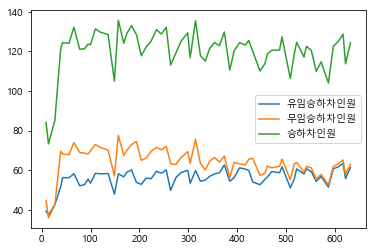

In [15]:
plt.rcParams['font.family'] = 'Malgun Gothic'
station1 = sub[sub['지하철역']=="제기동"]
sta1 = station1[['유임승하차인원','무임승하차인원','승하차인원']]
sta1.plot()

### 2호선 삼성역의 총 승하차인원과 유,무임승하차인원
* 삼성 : 무임승하차율이 가장 낮은 역

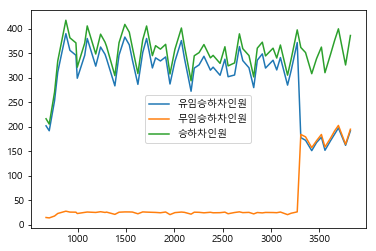

In [78]:
plt.rcParams['font.family'] = 'Malgun Gothic'
station2 = sub[sub['지하철역']=="삼성"]
sta2 = station2[['유임승하차인원','무임승하차인원','승하차인원']]
sta2.plot()

### 코로나 영향에 따른 지하철 이용객 수 변동 추이

2018년 12월 ~ 2019년 4월 데이터

In [14]:
sub_1812_1904 = sub[(sub.사용월 == 201812) | (sub.사용월 == 201901) | 
                    (sub.사용월 == 201902) | (sub.사용월 == 201903) | (sub.사용월 == 201904)]

2019년 12월 ~ 2020년 4월 데이터

In [15]:
sub_1912_2004 = sub[(sub.사용월 == 201912) | (sub.사용월 == 202001) | 
                    (sub.사용월 == 202002) | (sub.사용월 == 202003) | (sub.사용월 == 202004)]

2019년 1월 ~ 2019년 4월 데이터, 2019년 12월 ~ 2020년 4월 데이터 비교

C:\Users\Seoul IT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


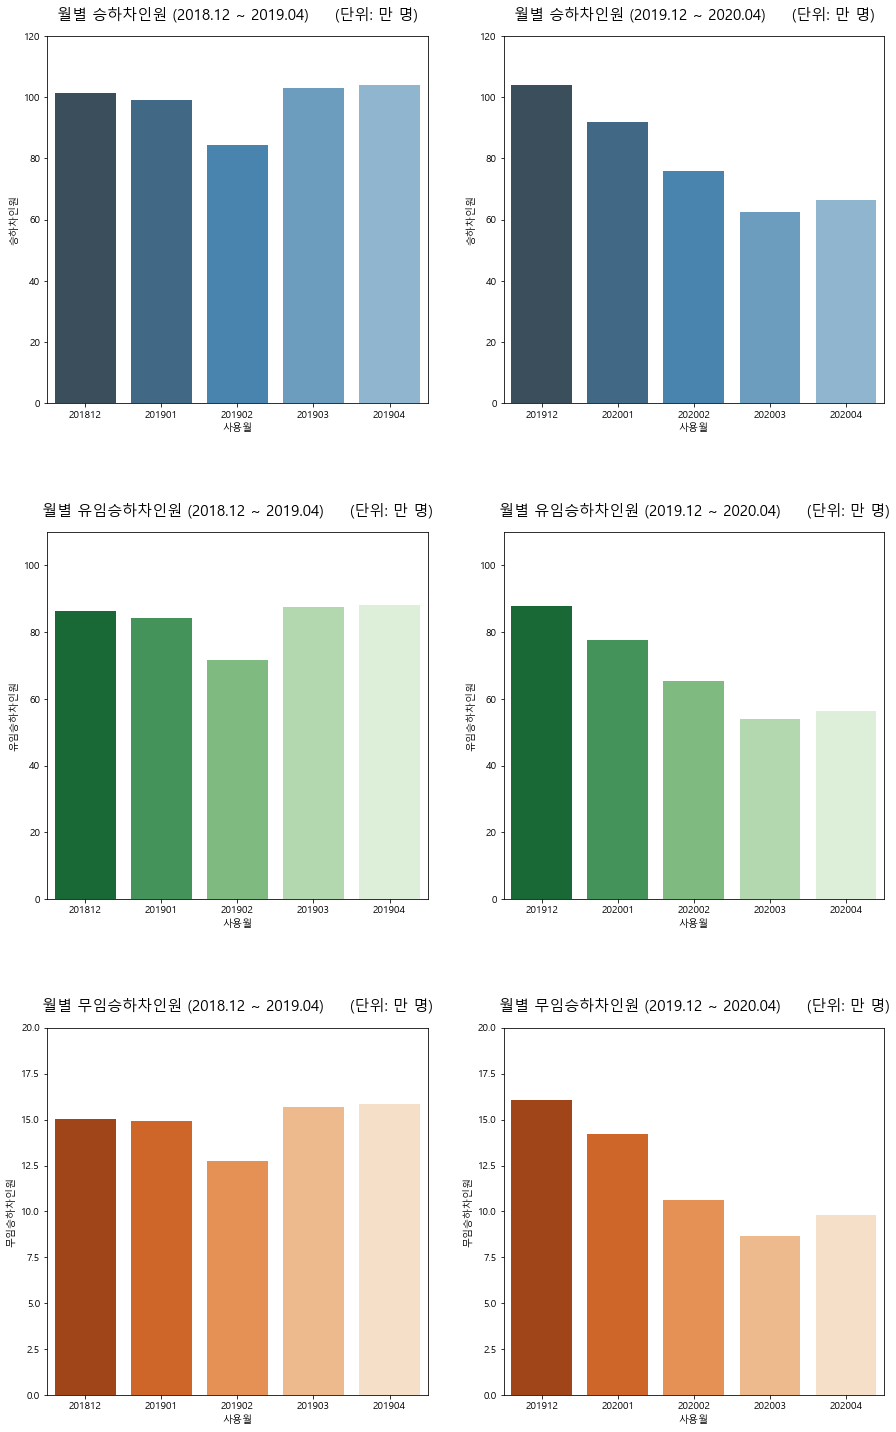

In [16]:
plt.figure(figsize=(15,25))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.ylim(0,120)
plt.title('월별 승하차인원 (2018.12 ~ 2019.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='승하차인원', data=sub_1812_1904, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.ylim(0,120)
plt.title('월별 승하차인원 (2019.12 ~ 2020.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='승하차인원', data=sub_1912_2004, ci=False, palette="Blues_d");

plt.subplot(3,2,3)
plt.ylim(0,110)
plt.title('월별 유임승하차인원 (2018.12 ~ 2019.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='유임승하차인원', data=sub_1812_1904, ci=False, palette="Greens_r")

plt.subplot(3,2,4)
plt.ylim(0,110)
plt.title('월별 유임승하차인원 (2019.12 ~ 2020.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='유임승하차인원', data=sub_1912_2004, ci=False, palette="Greens_r")

plt.subplot(3,2,5)
plt.ylim(0,20)
plt.title('월별 무임승하차인원 (2018.12 ~ 2019.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='무임승하차인원', data=sub_1812_1904, ci=False, palette="Oranges_r")

plt.subplot(3,2,6)
plt.ylim(0,20)
plt.title('월별 무임승하차인원 (2019.12 ~ 2020.04)     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='사용월', y='무임승하차인원', data=sub_1912_2004, ci=False, palette="Oranges_r")

plt.subplots_adjust(hspace=0.35)   # 그래프 간 위아래 간격 조정
plt.show()

제기동
* 코로나 전 : 2018년 12월 ~ 2019년 4월 데이터
* 코로나 후 : 2019년 12월 ~ 2020년 4월 데이터

In [55]:
station1_2019 = station1[(station1.사용월 == 201812) | (station1.사용월 == 201901) | 
                    (station1.사용월 == 201902) | (station1.사용월 == 201903) | (station1.사용월 == 201904)]
station1_2020 = station1[(station1.사용월 == 201912) | (station1.사용월 == 202001) | 
                    (station1.사용월 == 202002) | (station1.사용월 == 202003) | (station1.사용월 == 202004)]

jegi_2019 = station1_2019[['유임승하차인원','무임승하차인원','승하차인원']]
jegi_2020 = station1_2020[['유임승하차인원','무임승하차인원','승하차인원']]

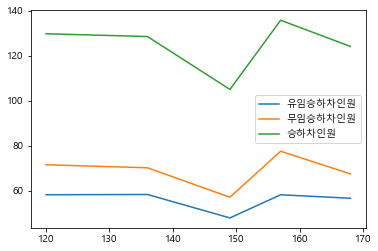

In [56]:
jegi_2019.plot()

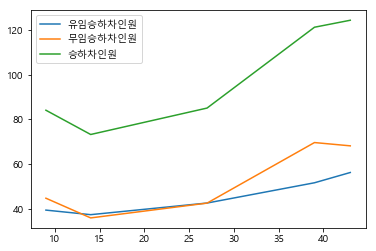

In [57]:
jegi_2020.plot()

삼성
* 코로나 전 : 2018년 12월 ~ 2019년 4월 데이터
* 코로나 후 : 2019년 12월 ~ 2020년 4월 데이터

In [79]:
station2_2019 = station2[(station2.사용월 == 201812) | (station2.사용월 == 201901) | 
                    (station2.사용월 == 201902) | (station2.사용월 == 201903) | (station2.사용월 == 201904)]
station2_2020 = station2[(station2.사용월 == 201912) | (station2.사용월 == 202001) | 
                    (station2.사용월 == 202002) | (station2.사용월 == 202003) | (station2.사용월 == 202004)]

samsung_2019 = station2_2019[['유임승하차인원','무임승하차인원','승하차인원']]
samsung_2020 = station2_2020[['유임승하차인원','무임승하차인원','승하차인원']]

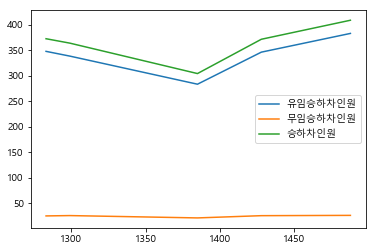

In [80]:
samsung_2019.plot()

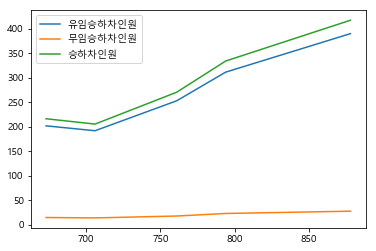

In [81]:
samsung_2020.plot()

### 지하철역별 승하차인원

In [21]:
# 15년도 지하철역별 승하차인원
grouped = sub_15['승하차인원'].groupby(sub['지하철역']).sum()
df_15 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_15 = df_15.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 16년도 지하철역별 승하차인원
grouped = sub_16['승하차인원'].groupby(sub['지하철역']).sum()
df_16 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_16 = df_16.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 17년도 지하철역별 승하차인원
grouped = sub_17['승하차인원'].groupby(sub['지하철역']).sum()
df_17 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_17 = df_17.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 18년도 지하철역별 승하차인원
grouped = sub_18['승하차인원'].groupby(sub['지하철역']).sum()
df_18 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_18 = df_18.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

# 19년도 지하철역별 승하차인원
grouped = sub_19['승하차인원'].groupby(sub['지하철역']).sum()
df_19 = pd.DataFrame({'지하철역':grouped.index,'승하차인원':grouped}).reset_index(drop=True)
top10_19 = df_19.sort_values(['승하차인원'], ascending=[False]).head(10).reset_index(drop=True)

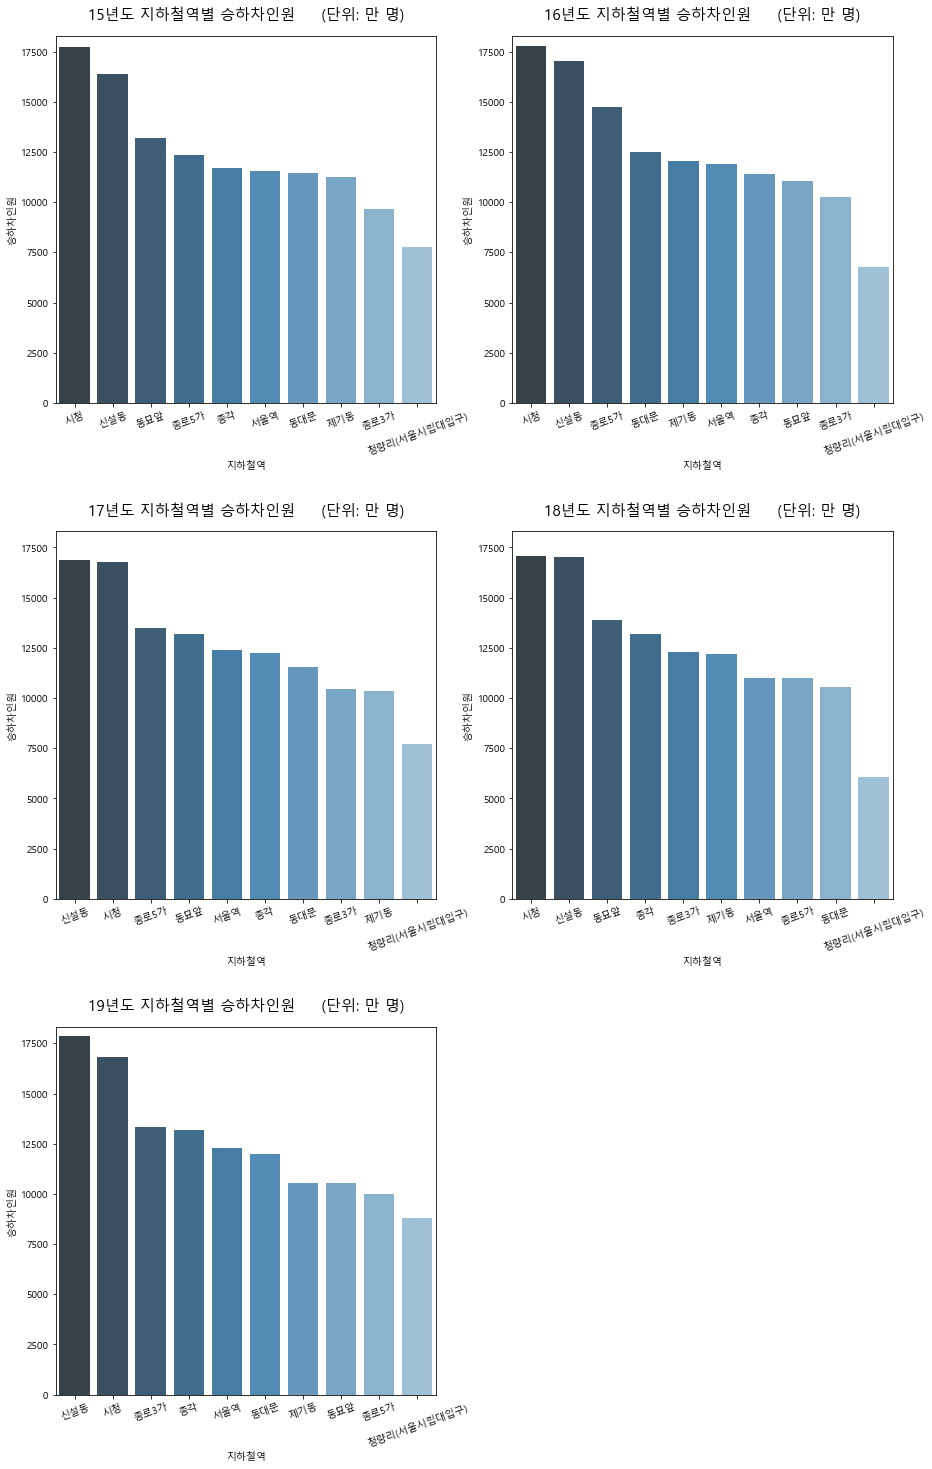

In [22]:
plt.figure(figsize=(15,25))
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.subplot(3,2,1)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('15년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_15, ci=False, palette="Blues_d")

plt.subplot(3,2,2)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('16년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_16, ci=False, palette="Blues_d")

plt.subplot(3,2,3)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('17년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_17, ci=False, palette="Blues_d")

plt.subplot(3,2,4)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('18년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_18, ci=False, palette="Blues_d")

plt.subplot(3,2,5)
plt.ylim(0,18300)
plt.xticks(rotation=20)
plt.title('19년도 지하철역별 승하차인원     (단위: 만 명)', size=15, position=(0.5, 1.0+0.03))
sns.barplot(x='지하철역', y='승하차인원', data=top10_19, ci=False, palette="Blues_d")

plt.subplots_adjust(hspace=0.35)
plt.show()